<a href="https://colab.research.google.com/github/Bisma-Shafiq/Machine-Learning-Tensorflow/blob/main/Tensorflow_ANN_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_trian,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_trian,x_test=x_trian/255.0,x_test/255.0

In [ ]:
# buils ml model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
predictions = model(x_trian[:1]).numpy()
predictions

array([[0.04677602, 0.12924716, 0.17737456, 0.08281698, 0.03193094,
        0.05378684, 0.09945613, 0.24866728, 0.08373599, 0.04620798]],
      dtype=float32)

In [ ]:
#The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()


array([[0.09461305, 0.10274667, 0.10781252, 0.09808519, 0.09321888,
        0.09527869, 0.09973089, 0.11577939, 0.09817536, 0.09455931]],
      dtype=float32)

In [ ]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_trian, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8267 - loss: 0.5807
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9375 - loss: 0.2051
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9522 - loss: 0.1575
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9597 - loss: 0.1330
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9627 - loss: 0.1232


In [ ]:
model.evaluate(x_test,y_test,verbose=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1101


[0.09386208653450012, 0.9710000157356262]

In [ ]:
# comparision on sklearn vs tensorflow


Scikit-learn Linear Regression
-------------------------------
Coefficient: 3.013793267336656
Intercept: -0.17281285407737457
Mean Squared Error: 0.8149047134980784


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

TensorFlow (Keras) Linear Regression
--------------------------------------
Mean Squared Error: 285.98434


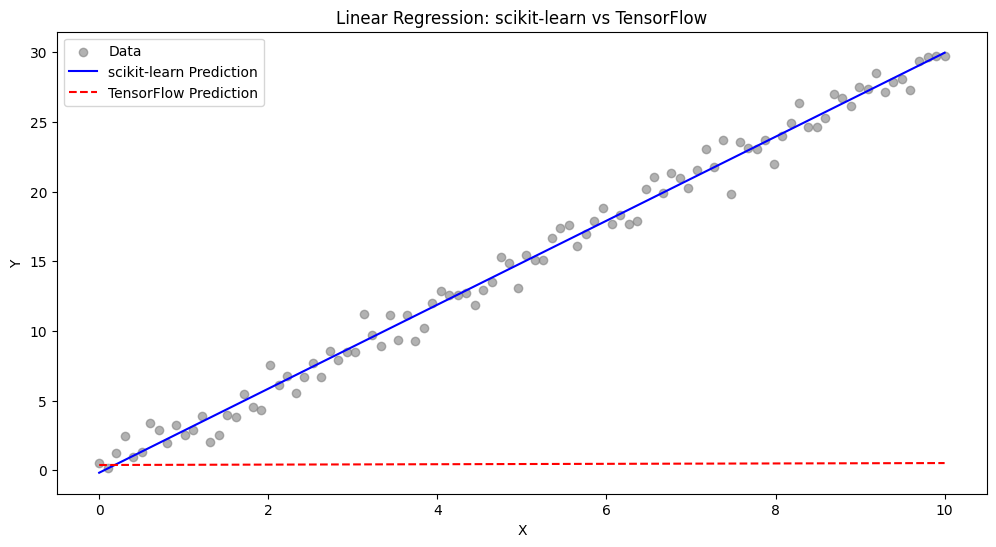

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For scikit-learn model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# For TensorFlow (Keras) model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------------------------
# Generate Synthetic Data
# -----------------------------------------------
np.random.seed(42)  # For reproducibility
X_values = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, 100)
Y_values = 3 * X_values + noise  # Linear relationship with noise

# Create a Pandas DataFrame for easy data manipulation
data = pd.DataFrame({'X': X_values, 'Y': Y_values})

# Prepare the data for modeling
X = data['X'].values.reshape(-1, 1)  # Reshape for both frameworks
y = data['Y'].values

# -----------------------------------------------
# Scikit-learn Implementation
# -----------------------------------------------
# Create and fit a linear regression model using scikit-learn
model_sk = LinearRegression()
model_sk.fit(X, y)

# Make predictions using the scikit-learn model
predictions_sk = model_sk.predict(X)

# Evaluate the scikit-learn model using Mean Squared Error (MSE)
mse_sk = mean_squared_error(y, predictions_sk)
print("Scikit-learn Linear Regression")
print("-------------------------------")
print("Coefficient:", model_sk.coef_[0])
print("Intercept:", model_sk.intercept_)
print("Mean Squared Error:", mse_sk)

# -----------------------------------------------
# TensorFlow (Keras) Implementation
# -----------------------------------------------
# Build a simple linear regression model using TensorFlow's Keras API
model_tf = Sequential([
    Dense(units=1, input_shape=(1,), activation='linear')
])

# Compile the model using the Adam optimizer and Mean Squared Error loss
model_tf.compile(optimizer='adam', loss='mean_squared_error')

# Train the TensorFlow model for 100 epochs
model_tf.fit(X, y, epochs=100, verbose=0)

# Make predictions using the trained TensorFlow model
predictions_tf = model_tf.predict(X)

# Evaluate the TensorFlow model's performance using Mean Squared Error (MSE)
mse_tf = tf.keras.losses.MeanSquaredError()(y, predictions_tf).numpy()
print("\nTensorFlow (Keras) Linear Regression")
print("--------------------------------------")
print("Mean Squared Error:", mse_tf)

# -----------------------------------------------
# Plotting the Results for Visual Comparison
# -----------------------------------------------
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Data', color='gray', alpha=0.6)
plt.plot(X, predictions_sk, label='scikit-learn Prediction', color='blue')
plt.plot(X, predictions_tf, label='TensorFlow Prediction', color='red', linestyle='--')
plt.title("Linear Regression: scikit-learn vs TensorFlow")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()
